<a href="https://colab.research.google.com/github/bharathmb7/eBPF-project/blob/main/lstm-gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


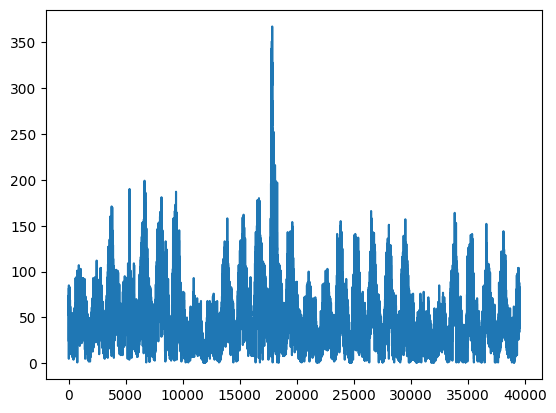

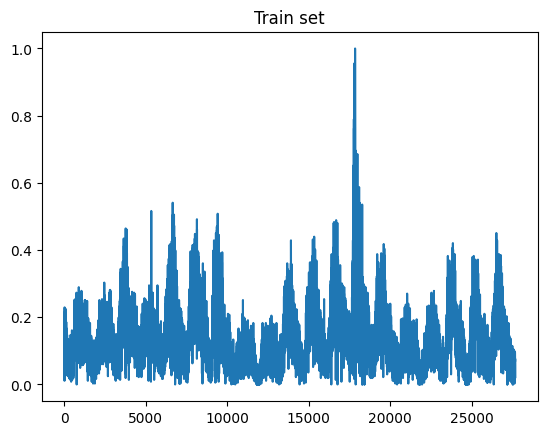

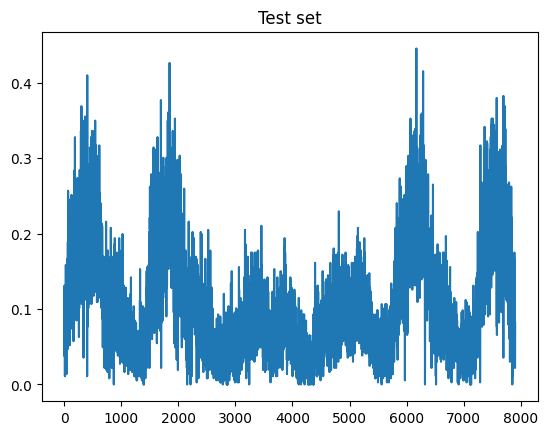

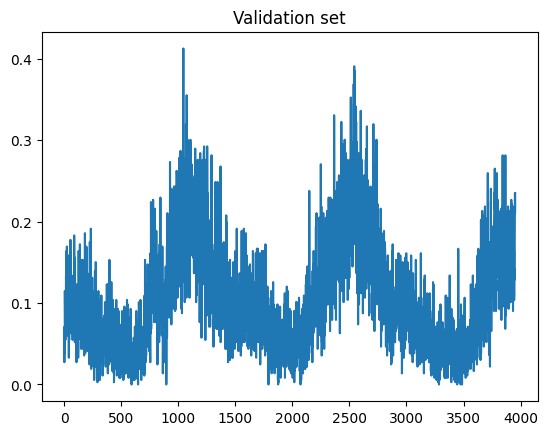

[[0.06557377 0.11202186 0.19945355 0.14754098 0.19945355 0.15300546
  0.15300546 0.13934426 0.17486339 0.11748634]
 [0.11202186 0.19945355 0.14754098 0.19945355 0.15300546 0.15300546
  0.13934426 0.17486339 0.11748634 0.12568306]
 [0.19945355 0.14754098 0.19945355 0.15300546 0.15300546 0.13934426
  0.17486339 0.11748634 0.12568306 0.1557377 ]
 [0.14754098 0.19945355 0.15300546 0.15300546 0.13934426 0.17486339
  0.11748634 0.12568306 0.1557377  0.19398907]
 [0.19945355 0.15300546 0.15300546 0.13934426 0.17486339 0.11748634
  0.12568306 0.1557377  0.19398907 0.12021858]]
[0.12568306 0.1557377  0.19398907 0.12021858 0.1010929 ]
[[0.06010929 0.0273224  0.05464481 0.07103825 0.03825137 0.1147541
  0.09016393 0.07103825 0.07103825 0.07923497]
 [0.0273224  0.05464481 0.07103825 0.03825137 0.1147541  0.09016393
  0.07103825 0.07103825 0.07923497 0.05464481]
 [0.05464481 0.07103825 0.03825137 0.1147541  0.09016393 0.07103825
  0.07103825 0.07923497 0.05464481 0.07923497]
 [0.07103825 0.03825137

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM,GRU
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import *
from tensorflow.keras import layers, regularizers, models
dataset = pd.read_csv('/content/drive/MyDrive/aggregated_data.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# print(dataset.size)
# # dataset=np.array(dataset)
# dataset=dataset[0:17500]
# print(dataset.size)
# plt.plot(dataset)
# plt.show()



# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.2)
val_size = len(dataset) - train_size - test_size

# split the dataset into train, test, and validation sets
train, test, val = dataset[:train_size], dataset[train_size:train_size+test_size], dataset[train_size+test_size:]

# plot the train set
plt.plot(train)
plt.title("Train set")
plt.show()

# plot the test set
plt.plot(test)
plt.title("Test set")
plt.show()

# plot the validation set
plt.plot(val)
plt.title("Validation set")
plt.show()



# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
valX, valY = create_dataset(val, look_back)
print(trainX[:5])
print(trainY[:5])
print(valX[:5])


In [ ]:
trainX.shape

(27659, 10)

In [ ]:
trainY.shape


(27659,)

In [ ]:

# reshape input to be [samples, time steps, features]

trainX = trainX.reshape( (trainX.shape[0], trainX.shape[1], 1))
testX = testX.reshape( (testX.shape[0],trainX.shape[1], 1))
#testY=testY.reshape((trainY.shape[1],trainY.shape[0]))
valX = valX.reshape( (valX.shape[0],valX.shape[1], 1))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
#print(valX.shape)

(27659, 10, 1)
(27659,)
(7894, 10, 1)
(7894,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(InputLayer(input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(15, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(15))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 15)            1020      
                                                                 
 dropout (Dropout)           (None, 10, 15)            0         
                                                                 
 gru (GRU)                   (None, 15)                1440      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 2476 (9.67 KB)
Trainable params: 2476 (9.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, epochs=50, batch_size=64,verbose=1, validation_data=(valX, valY))

Epoch 1/50
433/433 [==============================] - 16s 27ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 2/50
433/433 [==============================] - 9s 22ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 3/50
433/433 [==============================] - 5s 12ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 4/50
433/433 [==============================] - 6s 15ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 5/50
433/433 [==============================] - 5s 12ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 6/50
433/433 [==============================] - 6s 13ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 7/50
433/433 [==============================] - 6s 15ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/50
433/433 [==============================] - 5s 12ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 9/50
433/433 [==============================] - 7s 15ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/50
433/433 [==============================] - 5s 12ms/step - loss: 0.0021 - val_l

In [ ]:
# make predictions
import time
trainPredict = model.predict(trainX)
start_time = time.time()
testPredict = model.predict(testX)
valPredict = model.predict(valX)
end_time = time.time()
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
valPredict = scaler.inverse_transform(valPredict)
valY = scaler.inverse_transform([valY])

124/124 [==============================] - 0s 4ms/step


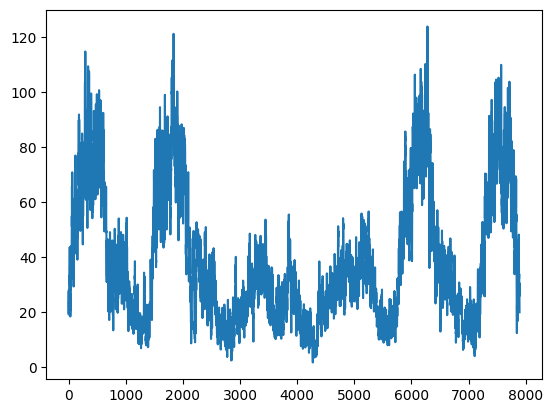

In [ ]:


plt.plot(testPredict)
plt.show()




Train Score: 16.10 RMSE
Test Score: 14.33 RMSE
Time taken for prediction: 1.67 seconds


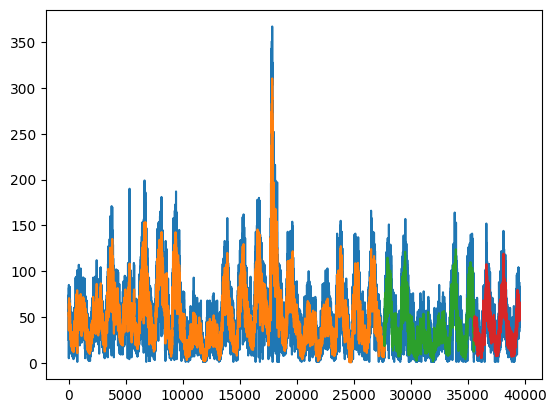

In [ ]:
from sklearn.metrics import mean_squared_error
#  calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



print('Time taken for prediction: {:.2f} seconds'.format(end_time - start_time))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(trainPredict)+len(testPredict)+1, :] = testPredict

valPredictPlot = np.empty_like(dataset)
valPredictPlot[:, :] = np.nan
valPredictPlot[-(len(valPredict)):, :] = valPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(valPredictPlot)
plt.show()

In [ ]:
# from tensorflow.keras.models import load_model

# saved_model = load_model('path_to_saved_model')
# # Example input data
# input_data = [1 2 3 4 5 6 7 8 9 10]

# # Make predictions using the loaded model
# predictions = saved_model.predict(input_data)

